**<h2>Outline</h2>**
* Exploratory Data Analysis
* Data Visualization 

In [1]:
#importing the modules necessary for this module
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import squarify

import re

In [2]:
#reading the .csv file
raw_data = pd.read_csv('/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv')
raw_data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


* Dropping the unwanted columns

In [3]:
#droped the unwanted columns from the dataframe
raw_data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
raw_data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


* changing the column name's for better intuition

In [4]:
#changed some column names for better intuition
raw_data.rename(columns={'Datum':'Date-Time',' Rocket':'Cost'},inplace='True')
raw_data.sample(5)

,Company Name,Location,Date-Time,Detail,Status Rocket,Cost,Status Mission
3908,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Tue Jan 25, 1966 12:28 UTC",Cosmos-2I (63SM) | Cosmos 106,StatusRetired,NaN,Success
112,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Aug 08, 2019 10:13 UTC",Atlas V 551 | AEHF 5,StatusActive,153.0,Success
1104,Lockheed,"SLC-36A, Cape Canaveral AFS, Florida, USA","Fri Mar 08, 2002 22:59 UTC",Atlas IIA | TDRS-I,StatusRetired,NaN,Success
4060,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu Dec 19, 1963 09:28 UTC",Vostok-2 | Cosmos 24,StatusRetired,NaN,Success
1888,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Mon Jun 05, 1989 22:37 UTC","Ariane 44L | Superbird-A, DFS-1",StatusRetired,NaN,Success


**all Columns are of object type**
* For most of the missions the cost value is missing and for the exsiting values, we have to convert them into proper format

In [5]:
#data information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date-Time       4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5   Cost            964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [6]:
#checking for the null values
raw_data.isna().sum()

Company Name         0
Location             0
Date-Time            0
Detail               0
Status Rocket        0
Cost              3360
Status Mission       0
dtype: int64

**Comapnies With Most Number of Missions**

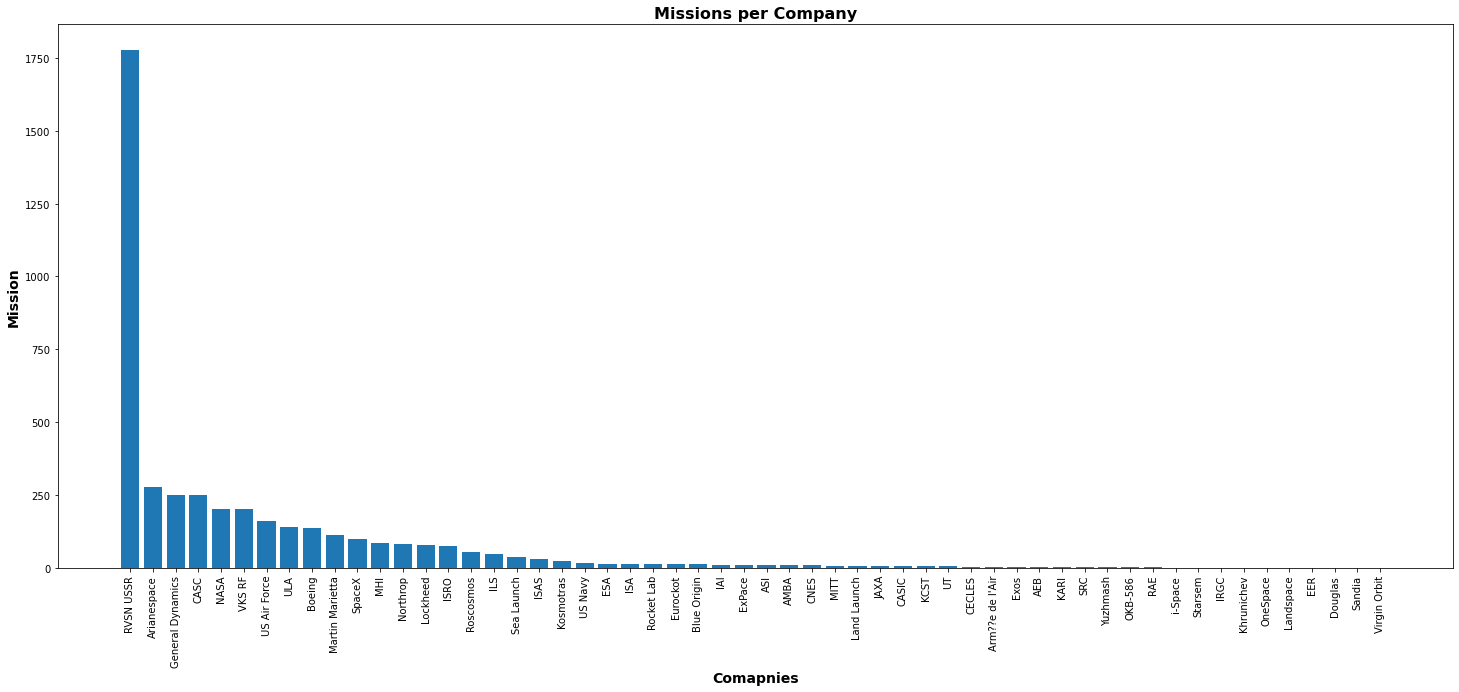

In [7]:
#ploting the bar graph on missions conducted by all the companies
temp_data = raw_data['Company Name'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(temp_data.index,temp_data.values)
plt.xticks(rotation=90)
plt.xlabel('Comapnies', weight='bold', fontsize=14)
plt.ylabel('Mission', weight='bold', fontsize=14)
plt.title('Missions per Company', weight='bold', fontsize=16)
plt.show()

it's very much clear that 'RVSN USSR' have tried way more than any other comapnies in the world.

In [8]:
#extracting the country name
countries = []
for location in raw_data.Location:
    countries.append(location.split(',')[-1])

raw_data['Country'] = np.array(countries)

raw_data.head(5)

,Company Name,Location,Date-Time,Detail,Status Rocket,Cost,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


**Top 20 contries by Missions**

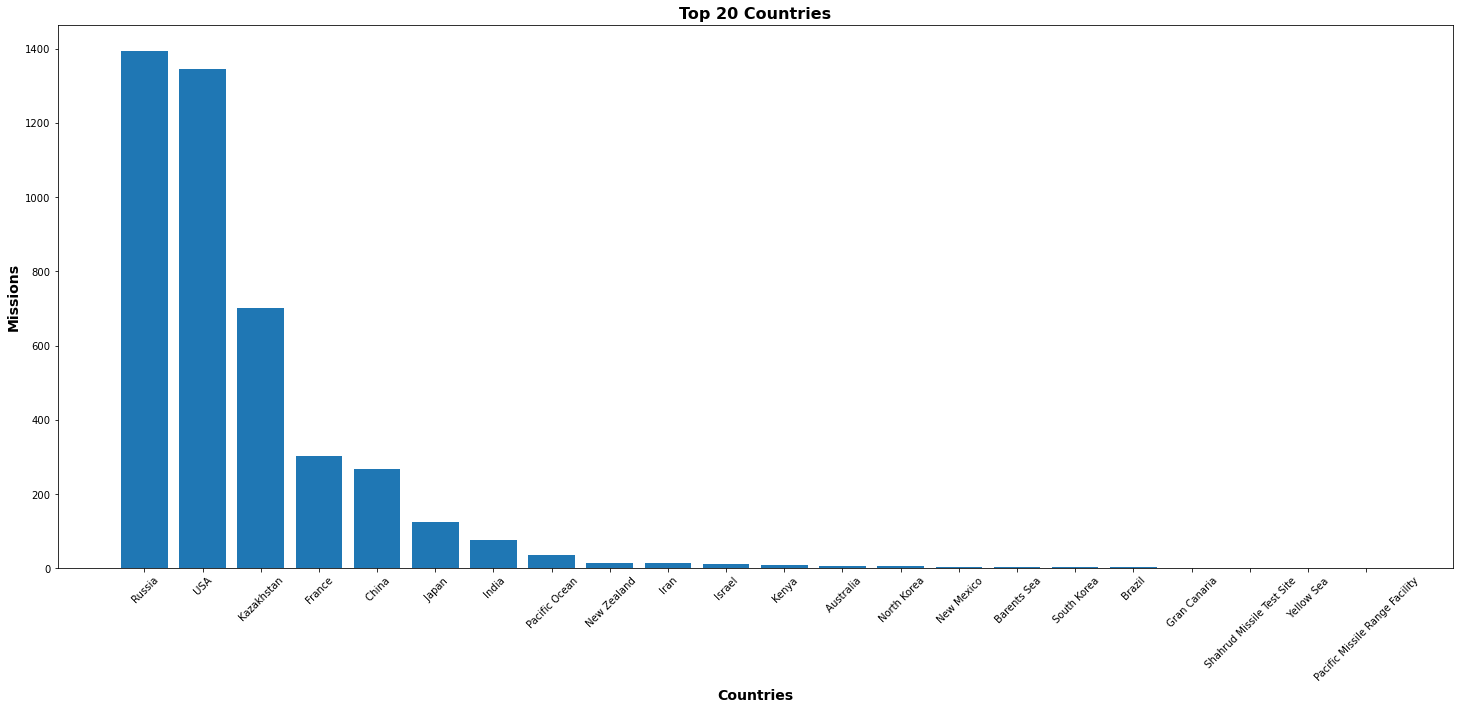

In [9]:
#top 20 countries based on space missions conducted
top20_Country = raw_data['Country'].value_counts().head(20)

positive = []
negative = []

countries = raw_data.Country.value_counts()

#plot the data
plt.figure(figsize=(25,10))
plt.bar(countries.index,countries.values)
plt.xticks(rotation=45)
plt.xlabel('Countries', fontsize=14, weight='bold')
plt.ylabel('Missions', fontsize=14, weight='bold')
plt.title('Top 20 Countries', fontsize=16, weight='bold')
plt.show()


**Top 20 comapnies with their Success rate**

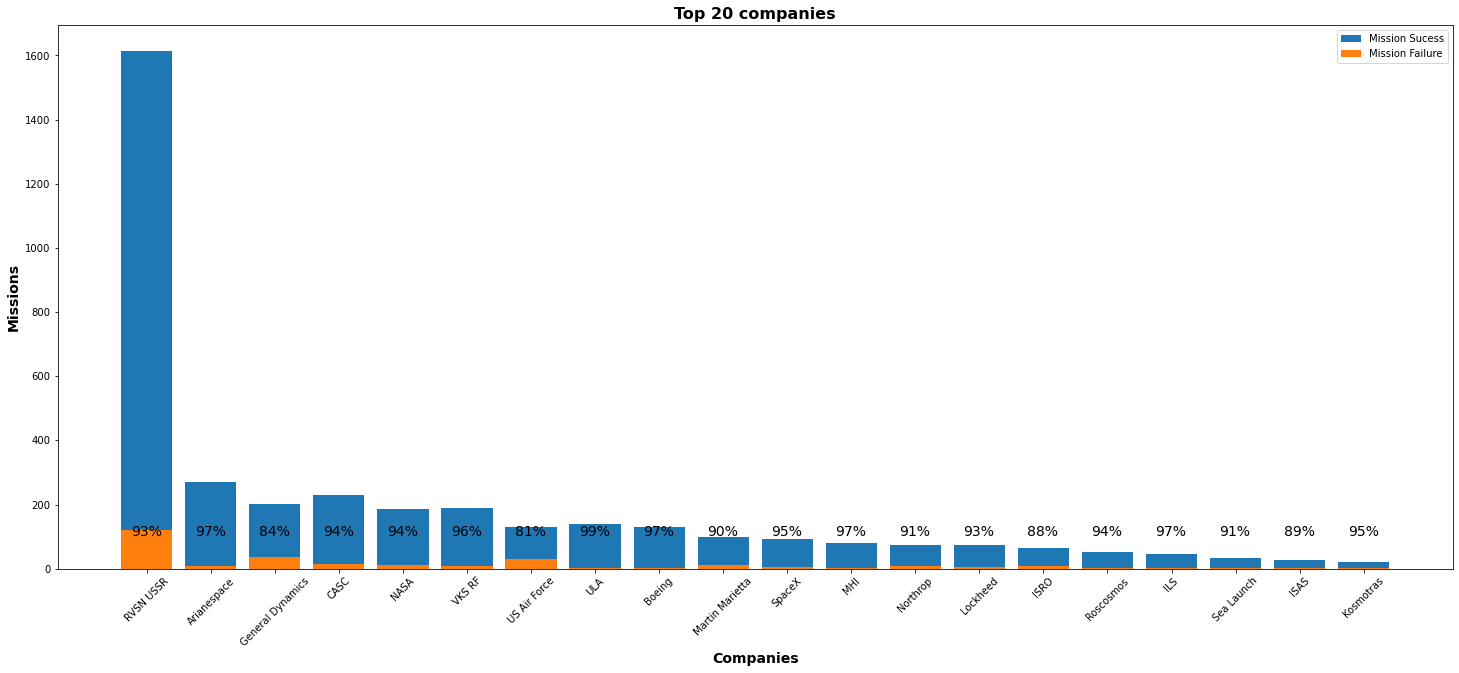

In [10]:
#ploting bar graph on mission conducted and the success rate of each of them
top20_Company = raw_data['Company Name'].value_counts().head(20)
positive = []
negative = []
labels = []
for company in top20_Company.index:
    unique_values = raw_data[raw_data['Company Name'] == company]['Status Mission'].value_counts()
    labels.append(int((unique_values[0]*100)/(unique_values[0]+unique_values[1])))
    positive.append(unique_values[0])
    negative.append(unique_values[1]) 
plt.figure(figsize=(25,10))
plt.bar(top20_Company.index,positive)
plt.bar(top20_Company.index,negative)

for i,v in enumerate(labels):
    plt.text(i-0.25,v/labels[i]+100,str(labels[i])+'%', fontsize=14)
    
plt.xticks(rotation=45)
plt.xlabel('Companies', weight='bold', fontsize=14)
plt.ylabel('Missions', weight='bold', fontsize=14)
plt.title('Top 20 companies', weight='bold', fontsize=16)
plt.legend(['Mission Sucess','Mission Failure'])
plt.show()

General dynamics and US air force had lower success rate than their peers

**Active Missions**

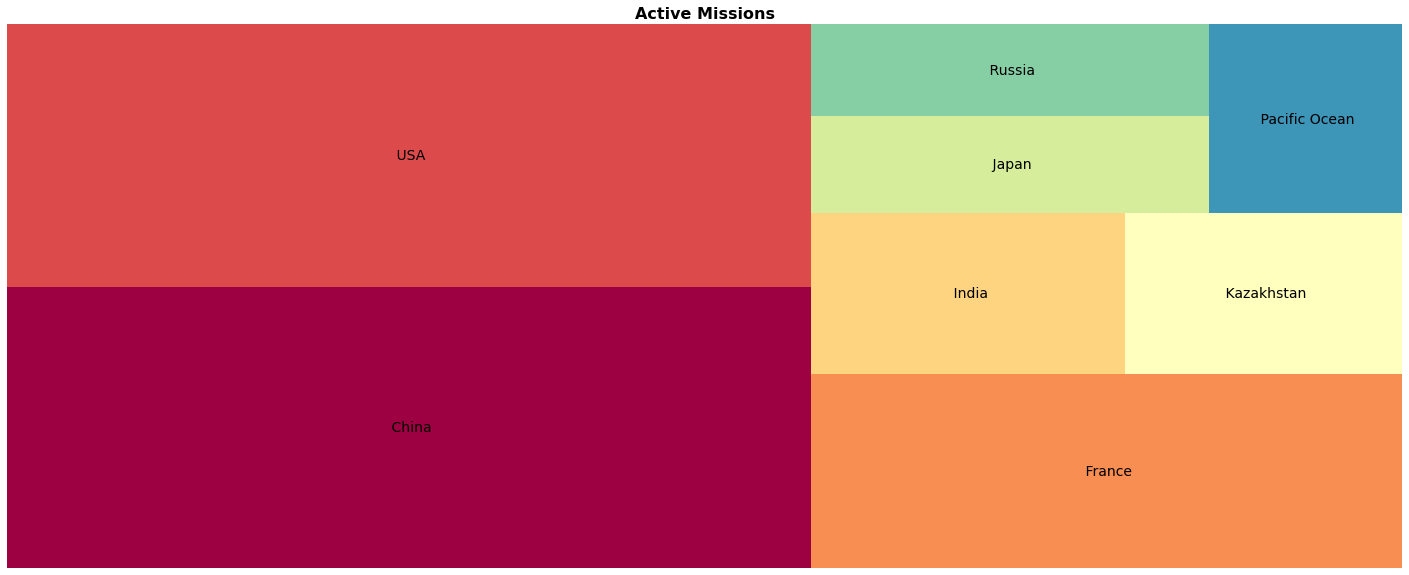

In [11]:
#treemap visualization of active missions
active_missions = raw_data[raw_data['Status Rocket'] == 'StatusActive']['Country'].value_counts().head(8)
values = active_missions.values[:]
index = active_missions.index[:]
colors = [plt.cm.Spectral(i/float(len(index))) for i in range(len(index))]

plt.figure(figsize=(25,10))
squarify.plot(label=index, sizes=values, color=colors, text_kwargs={'fontsize':14})
plt.title('Active Missions', weight='bold', fontsize=16)
plt.axis('off')

plt.show()

China and USA are the counties with most active missions.

In [12]:
import re

#extracting the year of launch
years = []
for year in raw_data["Date-Time"]:
    years.append(re.split(r'\s',year)[3])

raw_data['Year'] = np.array(years)

time_series = {}
for country in [' USA',' China',' Russia']:
    time_series[country] =  raw_data[raw_data['Country'] == country]['Year'].value_counts().sort_index()
raw_data.head(5)

,Company Name,Location,Date-Time,Detail,Status Rocket,Cost,Status Mission,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020


**USA, China, Russia**

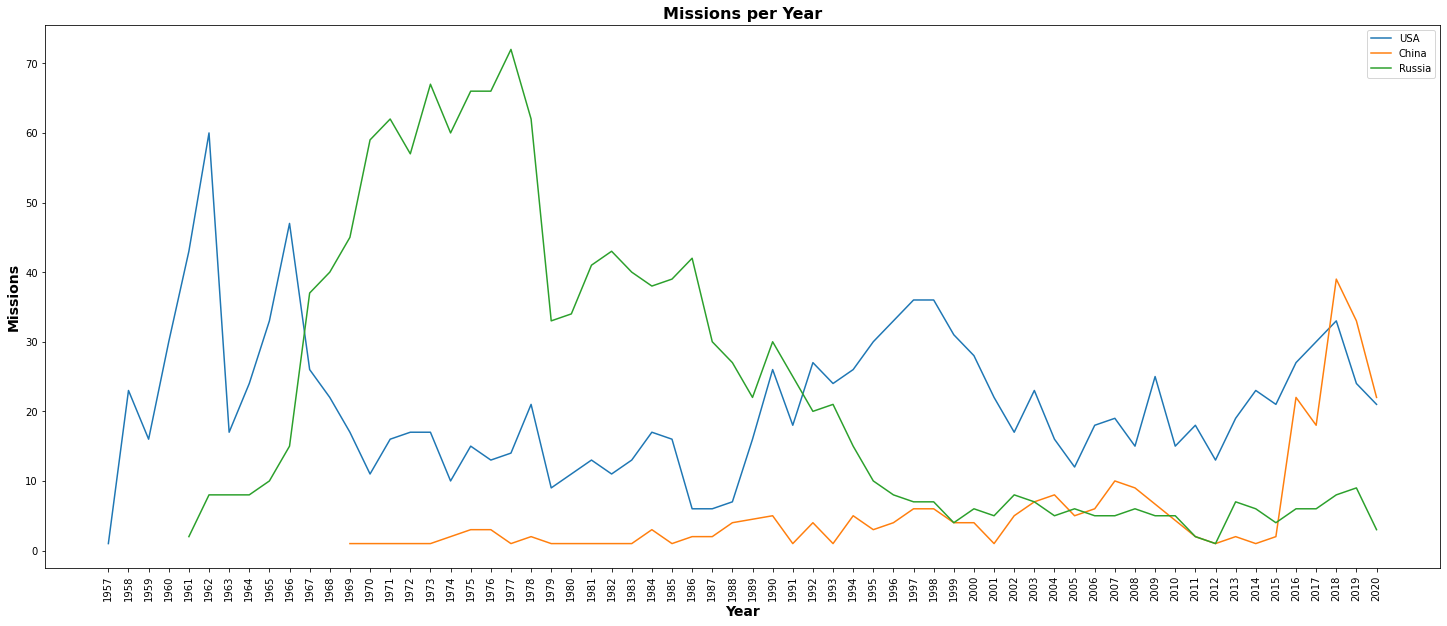

In [13]:
#top countries - based on their mission's every year
time_series = {}
for country in [' USA',' China',' Russia']:
    time_series[country] =  raw_data[raw_data['Country'] == country]['Year'].value_counts().sort_index()

plt.figure(figsize=(25,10))
plt.plot(time_series[' USA'].index, time_series[' USA'].values, label='USA')
plt.plot(time_series[' China'].index, time_series[' China'].values, label='China')
plt.plot(time_series[' Russia'].index, time_series[' Russia'].values, label='Russia')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Missions', fontsize=14, weight='bold')
plt.title('Missions per Year', fontsize=16, weight='bold')
plt.show()